In [17]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit import Aer
from qiskit.tools.jupyter.library import _generate_circuit_library_visualization
from qiskit.circuit.library import QFT
import numpy as np
pi = np.pi
backend = Aer.get_backend('statevector_simulator')
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')
circuit = QuantumCircuit(q,c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
qft_circuit = QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False,
insert_barriers=False, name="qft")
circuit = circuit.compose(qft_circuit)
circuit.measure(q,c)
circuit.draw(output="mpl", filename="qft1.png").show()

print(circuit)
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print("\n QFT Output")
print("-------------")
print(counts)

     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 
Job Status: job has successfully run

 QFT Output
-------------
{'01010': 32, '11100': 40, '00110': 21, '00001': 32, '10101': 35, '10010': 27, '01101': 37, '01001': 26, '10001': 26, '11010': 33, '00101': 35, '10011': 26, '10111': 38, '10100': 33, '00111': 38, '00011': 37, '01011': 35, '11000': 32, '11111': 29, '11011': 36, '10000': 24, '11110': 32, '11101': 26, '00010': 32, '01111': 30, '10110': 28, '00100': 31, '11001': 38, '00000': 30, '01110': 26, '01000': 32, '01100': 23}


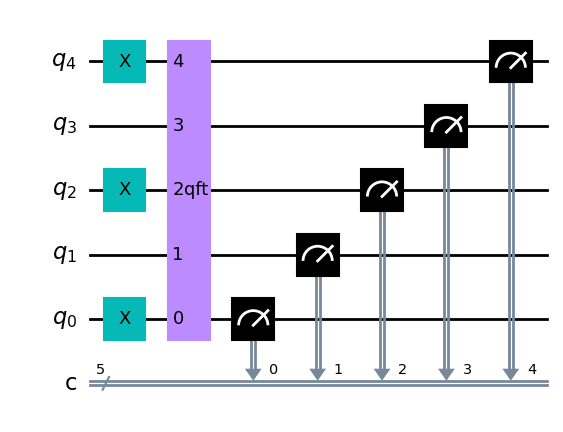

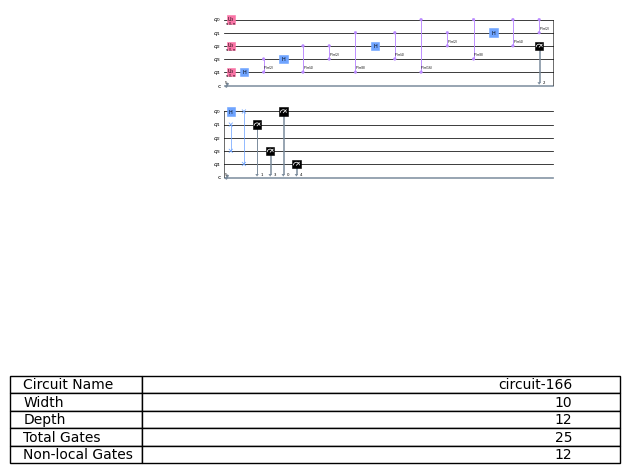

In [23]:
_generate_circuit_library_visualization(circuit)